<a href="https://colab.research.google.com/github/AsifShaafi/Deep-Learning-Course-Examples/blob/main/CNN_Examples/Shaafi_LeNet_CNN_MNIST_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement the LeNet architecture for classification of MNIST data.

In [ ]:
# import libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Flatten, Dense, Dropout

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



In [ ]:
# Load the MNIST dataset using the mnist.load_data() function.
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [ ]:
# Normalize the pixel values to the range [0, 1] using the astype() method.
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


In [ ]:
# Reshape the input data to have a single channel using the reshape() method.
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))


In [ ]:
# Convert the labels to one-hot encoding using the to_categorical() function.
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


In [ ]:
# Define the LeNet model architecture using the Sequential() function and
# add convolutional, average pooling, and dense layers using the
# Conv2D(), AveragePooling2D(), Flatten(), and Dense() functions.
model = Sequential([
    Conv2D(6, (5, 5), activation="relu", padding='same', input_shape=(28, 28, 1)),
    # AveragePooling2D(),
    MaxPooling2D((2, 2,), strides=(2, 2)),
    Conv2D(16, (5, 5), activation="relu"),
    # AveragePooling2D(),
    MaxPooling2D((2, 2,), strides=(2, 2)),
    Flatten(),
    Dense(120, activation="relu"),
    Dense(84, activation="relu"),
    Dense(num_classes, activation="softmax")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [ ]:
# Compile the model using the compile() method and
# specify the optimizer, loss function, and metrics to use during training.
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:
# Train the model using the fit() method and specify the number of epochs to train for and the batch size to use.
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))


Epoch 1/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3200 - accuracy: 0.9036 - val_loss: 0.0721 - val_accuracy: 0.9775
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0934 - accuracy: 0.9718 - val_loss: 0.0729 - val_accuracy: 0.9769
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0672 - accuracy: 0.9792 - val_loss: 0.0432 - val_accuracy: 0.9852
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0535 - accuracy: 0.9832 - val_loss: 0.0416 - val_accuracy: 0.9865
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0464 - accuracy: 0.9854 - val_loss: 0.0322 - val_accuracy: 0.9890
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0385 - accuracy: 0.9881 - val_loss: 0.0339 - val_accuracy: 0.9890
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0342 - accuracy: 0.9894 - val_loss: 0.0311 - val_accuracy: 0.9903
Epoch 

In [ ]:
# Evaluate the model on the test set using the evaluate() method and print the test accuracy.
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: ", test_loss)
print("Test Accuracy:", test_acc)

  1/313 [..............................] - ETA: 4s - loss: 0.0118 - accuracy: 1.0000

313/313 [==============================] - 0s 1ms/step - loss: 0.0293 - accuracy: 0.9888
Test Loss:  0.029292916879057884
Test Accuracy: 0.9887999892234802


1/1 [==============================] - 0s 45ms/step
3


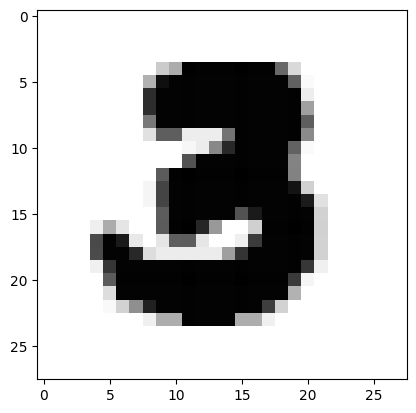

In [ ]:
# One image prediction
image_index = 200
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

313/313 [==============================] - 1s 2ms/step


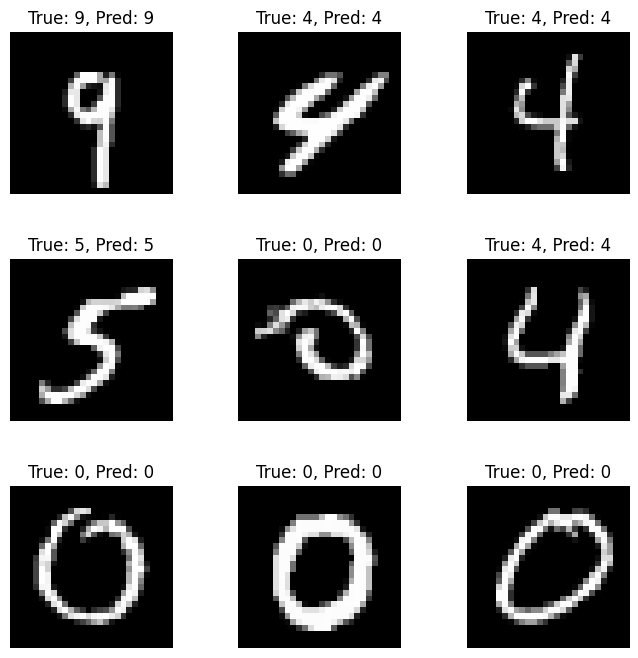

In [ ]:
# Display a few example plots of test results
# Get the predicted labels for the test set
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# Display a few example plots of test results
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axs = axs.ravel()
for i in range(9):
    idx = np.random.randint(0, len(x_test))
    axs[i].imshow(x_test[idx, :, :, 0], cmap="gray")
    axs[i].set_title(f"True: {np.argmax(y_test[idx])}, Pred: {y_pred[idx]}")
    axs[i].axis("off")
plt.show()
